In [ ]:
import pandas as pd

In [ ]:
df_train = pd.read_csv('data_training.csv',sep=';')

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459965 entries, 0 to 459964
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   DocsDate              459965 non-null  object
 1   ImportDuty_IDR        459965 non-null  int64 
 2   CIF                   459965 non-null  object
 3   Valuta_CIF            459965 non-null  object
 4   Using_Intermediaries  459965 non-null  int64 
 5   Using_TradeAgreement  459965 non-null  int64 
 6   COuntryOfOrigin       459962 non-null  object
 7   HSCODE                459965 non-null  int64 
 8   CustChannel           459965 non-null  object
dtypes: int64(4), object(5)
memory usage: 31.6+ MB


In [ ]:
df_train['CustChannel'].unique()

array(['Green', 'Red', 'Yellow'], dtype=object)

In [ ]:
df_train.head()

,DocsDate,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE,CustChannel
0,09/10/2022,254458953,170458,USD,0,0,TH,8708,Green
1,02/05/2022,1719402722,1237513,USD,0,0,MY,4016,Green
2,02/04/2022,662630024,40640204,JPY,0,0,JP,7318,Green
3,08/05/2022,7443742,1159783,JPY,1,0,CN,8443,Green
4,02/08/2022,20795848,207958981,IDR,0,0,MX,8708,Green


In [ ]:
df_train['CIF'] = df_train['CIF'].str.replace(',', '', regex=True)
df_train['CIF'] = df_train['CIF'].astype('float').astype('int64')


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459965 entries, 0 to 459964
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   DocsDate              459965 non-null  object
 1   ImportDuty_IDR        459965 non-null  int64 
 2   CIF                   459965 non-null  int64 
 3   Valuta_CIF            459965 non-null  object
 4   Using_Intermediaries  459965 non-null  int64 
 5   Using_TradeAgreement  459965 non-null  int64 
 6   COuntryOfOrigin       459962 non-null  object
 7   HSCODE                459965 non-null  int64 
 8   CustChannel           459965 non-null  object
dtypes: int64(5), object(4)
memory usage: 31.6+ MB


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in df_train.columns:
        if df_train[i].dtypes == object:
            df_train[i] = labelencoder.fit_transform(df_train[i])

In [ ]:
df_train.head()

,DocsDate,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE,CustChannel
0,103,254458953,170458,19,0,0,110,8708,0
1,16,1719402722,1237513,19,0,0,78,4016,0
2,15,662630024,40640204,10,0,0,58,7318,0
3,86,7443742,1159783,10,1,0,21,8443,0
4,19,20795848,207958981,8,0,0,77,8708,0


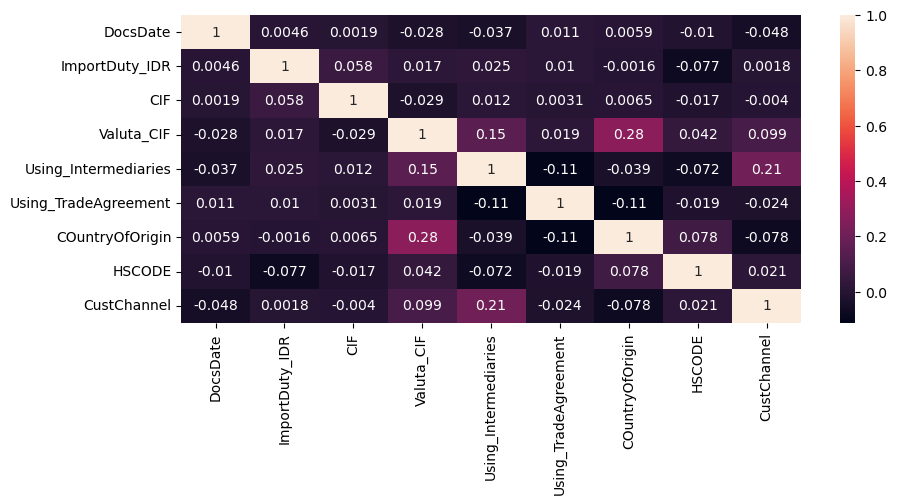

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
sns.heatmap(df_train.corr(),annot=True)
plt.show()

In [ ]:
y = df_train.CustChannel
x = df_train.drop(columns=['CustChannel','ImportDuty_IDR','CIF'])

In [ ]:
x.head()

,DocsDate,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE
0,103,19,0,0,110,8708
1,16,19,0,0,78,4016
2,15,10,0,0,58,7318
3,86,10,1,0,21,8443
4,19,8,0,0,77,8708


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x= pd.DataFrame(scaler.transform(x),
                              columns = x.columns)

In [ ]:
x.head()

,DocsDate,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE
0,0.376234,0.840033,-1.145881,-0.34143,1.501341,0.803551
1,-1.031300,0.840033,-1.145881,-0.34143,0.523350,-1.331880
2,-1.047479,-0.786385,-1.145881,-0.34143,-0.087895,0.170932
3,0.101198,-0.786385,0.872691,-0.34143,-1.218697,0.682944
4,-0.982765,-1.147811,-1.145881,-0.34143,0.492788,0.803551


In [ ]:
y.value_counts()

0    420544
1     20325
2     19096
Name: CustChannel, dtype: int64

In [ ]:
# from imblearn.over_sampling import SMOTE

# smote = SMOTE(sampling_strategy='auto', random_state=0)

# X_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
# y_resampled.value_counts()

In [ ]:
RANDOM_STATE = 0
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
X_train, X_val, y_train, y_val = train_test_split(x, y, train_size = 0.8, random_state = RANDOM_STATE)

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)

In [ ]:
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
clfpred=clf.predict(X_val)

In [ ]:
print('RandomForestClassifier Score')
acc=accuracy_score(y_val,clfpred)
cm=confusion_matrix(y_val,clfpred)
cr=classification_report(y_val,clfpred)
tr=clf.score(X_train,y_train)
te=clf.score(X_val,y_val)
print(f'Accuracy: {acc}\n{cm}\n{cr}\nTraining Accuracy: {tr}\nTesting Accuracy: {te}')

RandomForestClassifier Score
Accuracy: 0.9649429847923211
[[82956   494   477]
 [  985  2946   155]
 [  998   116  2866]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     83927
           1       0.83      0.72      0.77      4086
           2       0.82      0.72      0.77      3980

    accuracy                           0.96     91993
   macro avg       0.87      0.81      0.84     91993
weighted avg       0.96      0.96      0.96     91993

Training Accuracy: 0.9859744763188504
Testing Accuracy: 0.9649429847923211


In [ ]:
clf.fit(x,y)

RandomForestClassifier()

In [ ]:
df_test = pd.read_csv('data_testing.csv',sep=';')

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    39996 non-null  object
 1   DocsDate              39996 non-null  object
 2   ImportDuty_IDR        39996 non-null  int64 
 3   CIF                   39996 non-null  int64 
 4   Valuta_CIF            39996 non-null  object
 5   Using_Intermediaries  39996 non-null  int64 
 6   Using_TradeAgreement  39996 non-null  int64 
 7   COuntryOfOrigin       39996 non-null  object
 8   HSCODE                39996 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 2.7+ MB


In [ ]:
df_test.head()

,ID,DocsDate,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE
0,C1,02/01/2022,28212800050,41584240,USD,0,0,NZ,206
1,C2,12/11/2022,259418090,13014510,JPY,0,0,JP,4016
2,C3,16/11/2022,2597872060,1413620,USD,0,0,TH,7318
3,C4,03/09/2022,11550943500,15789680,USD,1,1,CN,8708
4,C5,04/04/2022,1871500400,95652240,JPY,1,0,JP,3926


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for i in df_test.columns:
    if i != 'ID':
        if df_test[i].dtypes == object:
            df_test[i] = labelencoder.fit_transform(df_test[i])

In [ ]:
df_test.head()

,ID,DocsDate,ImportDuty_IDR,CIF,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE
0,C1,12,28212800050,41584240,18,0,0,60,206
1,C2,132,259418090,13014510,10,0,0,43,4016
2,C3,170,2597872060,1413620,18,0,0,79,7318
3,C4,30,11550943500,15789680,18,1,1,12,8708
4,C5,37,1871500400,95652240,10,1,0,43,3926


In [ ]:
x_test = df_test.copy().drop(columns=['ID','ImportDuty_IDR','CIF'])

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   DocsDate              39996 non-null  int32
 1   Valuta_CIF            39996 non-null  int32
 2   Using_Intermediaries  39996 non-null  int64
 3   Using_TradeAgreement  39996 non-null  int64
 4   COuntryOfOrigin       39996 non-null  int32
 5   HSCODE                39996 non-null  int64
dtypes: int32(3), int64(3)
memory usage: 1.4 MB


In [ ]:
x_test= pd.DataFrame(scaler.transform(x_test),
                              columns = x_test.columns)

In [ ]:
x_test.head()

,DocsDate,Valuta_CIF,Using_Intermediaries,Using_TradeAgreement,COuntryOfOrigin,HSCODE
0,-1.096015,0.659320,-1.145881,-0.341430,-0.026770,-3.065893
1,0.845412,-0.786385,-1.145881,-0.341430,-0.546328,-1.331880
2,1.460196,0.659320,-1.145881,-0.341430,0.553912,0.170932
3,-0.804801,0.659320,0.872691,2.928859,-1.493757,0.803551
4,-0.691551,-0.786385,0.872691,-0.341430,-0.546328,-1.372841


In [ ]:
predictions = clf.predict(x_test)

In [ ]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
mapping = {0: 'Green', 1: 'Red', 2: 'Yellow'}

In [ ]:
import numpy as np
pred_mapped = np.vectorize(mapping.get)(predictions)

In [ ]:
pred_mapped

array(['Green', 'Green', 'Green', ..., 'Green', 'Green', 'Green'],
      dtype='<U6')

In [ ]:
output = pd.DataFrame({'ID':df_test.ID,'CustChannel':pred_mapped})
output.to_csv('submission_5(03-11-2023).csv', index=False)

In [ ]:
output.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39996 entries, 0 to 39995
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           39996 non-null  object
 1   CustChannel  39996 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB
